# Setup

In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
import scipy
from sklearn.neighbors import NearestNeighbors # importing the library
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
earth_density    = 5.51   # [g/cm**3]

In [134]:
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")

In [135]:
# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))
period_EA            = dataEA.pl_orbper          # [days]
radius_EA            = dataEA.pl_rade            # [Earth Radius]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.

mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature

# Filter Planets

In [141]:
def filter_planets(planet_name_list,rel_unc_mass_criteria,rel_unc_density_criteria):
    EA_planets = []
    for i in range(0,len(planet_name_list)):
        if radius_EA[i]<4 and isinstance(st_spectype_EA[i],str) and "M" in st_spectype_EA[i]:
            relative_uncertainty_mass    = (mass_unc_up_EA[i] - mass_unc_low_EA[i]) / (2 * mass_EA[i])
            relative_uncertainty_density = (density_unc_up_EA[i] - density_unc_low_EA[i]) / (2 * density_EA[i])
            if relative_uncertainty_mass < rel_unc_mass_criteria and relative_uncertainty_density < rel_unc_density_criteria:
                EA_planets.append(planet_name_list[i])
    if rel_unc_mass_criteria > 0.06 and rel_unc_density_criteria > 0.06:
    #### Adding the TRAPPIST-1 planets  ##### (biggest rel_err around 6%)
        EA_add_index = [5209,5210,5211,5212,5213,5214,5215] # adding the Trappist Planets
        for i in EA_add_index:
            EA_planets.append(planet_name_EA[i])
    return EA_planets

def find_planet_index(name):
    return (list(EA_planets).index(name))


In [137]:
def make_lists(EA_planets):
    planet      = [];planet_i       = []; 
    radius      = []; radius_up     = []; radius_low  = []
    mass        = [];  mass_up      = []; mass_low    = []
    density     = []; density_up    = []; density_low = []

    for i in range(0,len(EA_planets)):
        index  = list(planet_name_EA).index(EA_planets[i]); planet.append(dataEA.pl_name[index])
        radius.append(dataEA.pl_rade[index]); radius_up.append(dataEA.pl_radeerr1[index]); radius_low.append(dataEA.pl_radeerr2[index])
        density.append(dataEA.pl_dens[index]); density_up.append(dataEA.pl_denserr1[index]); density_low.append(dataEA.pl_denserr2[index])
        mass.append(dataEA.pl_bmasse[index]); mass_up.append(dataEA.pl_bmasseerr1[index]);  mass_low.append(dataEA.pl_bmasseerr2[index])
    return index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low

### Want to find a planet in the list?

In [138]:
EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)

def find_planet_index_EA(name):
    return (list(planet_name_EA).index(name))

name_find  = 'GJ 367 b'
index_mark = find_planet_index_EA(name_find)
relative_uncertainty_mass    = (mass_unc_up_EA[index_mark] - mass_unc_low_EA[index_mark]) / (2 * mass_EA[index_mark])
relative_uncertainty_density = (density_unc_up_EA[index_mark] - density_unc_low_EA[index_mark]) / (2 * density_EA[index_mark])

#print(name_find,index_mark,list(st_spectype_EA)[index_mark])
#print(relative_uncertainty_mass,relative_uncertainty_density)
#print(density_EA[index_mark])

### Plot selected planets

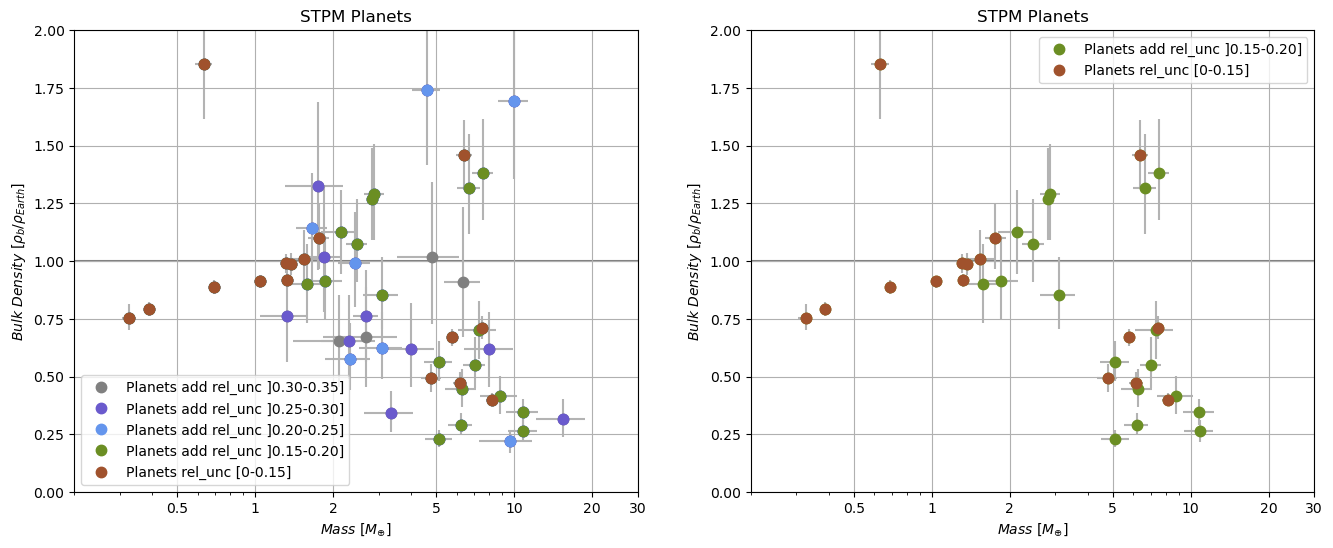

In [142]:
plt.figure(figsize=(16, 6))
markersize = 15
plt.subplot(1, 2, 1)
EA_planets = filter_planets(planet_name_EA,0.35,0.35)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.30-0.35]",color = "grey",markersize = markersize)

EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.25-0.30]",color = "slateblue",markersize = markersize)

EA_planets = filter_planets(planet_name_EA,0.25,0.25)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.20-0.25]",color = "cornflowerblue",markersize = markersize)


EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.15-0.20]",color = "olivedrab",markersize = markersize)

EA_planets = filter_planets(planet_name_EA,0.15,0.15)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets rel_unc [0-0.15]",color = "Sienna",markersize = markersize)

# Formatting
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.title("STPM Planets"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); leg = plt.legend(); plt.hlines(1,0,30,"grey",zorder = -30); plt.grid()

plt.subplot(1, 2, 2)

EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err   = [np.abs(mass_low),mass_up]; density_err = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.15-0.20]",color = "olivedrab",markersize = markersize)

EA_planets = filter_planets(planet_name_EA,0.15,0.15)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err   = [np.abs(mass_low),mass_up]; density_err = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets rel_unc [0-0.15]",color = "Sienna",markersize = markersize)
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.title("STPM Planets"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); leg = plt.legend(); plt.hlines(1,0,30,"grey",zorder = -30); plt.grid()

Marked planet:TRAPPIST-1 d has mass: 0.388 and denstiy: 4.366784
Find planet:TRAPPIST-1 d has mass: 0.388 and denstiy: 4.366784
Find planet:TRAPPIST-1 e has mass: 0.692 and denstiy: 4.901605
Find planet:TRAPPIST-1 h has mass: 0.326 and denstiy: 4.16278


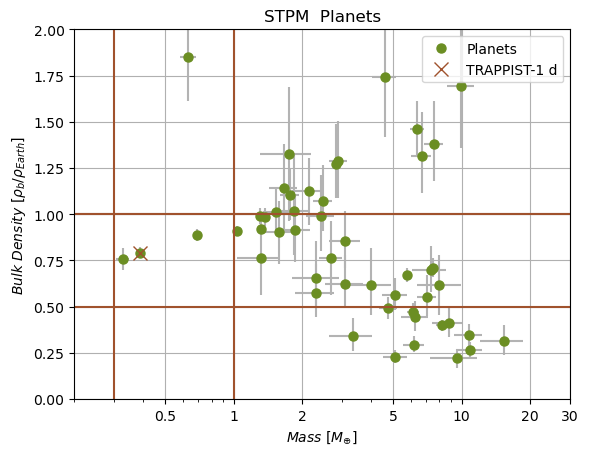

In [143]:
EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]

plt.plot(mass,np.divide(density,earth_density),".",label = "Planets",color = "olivedrab",markersize = 13)
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-32)

#### Want to find a specific planet? #####
name_find  = "TRAPPIST-1 d"
if isinstance(name_find,str):
    index_mark = find_planet_index(name_find)
    plt.plot(mass[index_mark],np.divide(density[index_mark],earth_density),"x",color = "sienna",label = name_find,markersize = 10
)
    print("Marked planet:" + name_find + " has mass: " + str(mass[index_mark]) + " and denstiy: " + str(density[index_mark]))

#### What planets are in this area ####
find_planets_in_range = True
mass_range    = [0.3,1]
density_range = [0.5,1]  # in density/earth bulk density

if find_planets_in_range == True:
    plt.hlines(density_range[0],0,30,"sienna",zorder = 2)
    plt.hlines(density_range[1],0,30,"sienna",zorder = 2)
    plt.vlines(mass_range[0],0,2,"sienna")
    plt.vlines(mass_range[1],0,2,"sienna")
    for i in range(0,len(mass)):
        if mass_range[0] < mass[i] < mass_range[1] and density_range[0] < np.divide(density[i],earth_density) < density_range[1]:
            print("Find planet:" + planet[i] + " has mass: " + str(mass[i]) + " and denstiy: " + str(density[i]))

plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.legend()
plt.title("STPM  Planets"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend(); plt.grid(); plt.hlines(1,0,30,"grey",zorder = -30)

## Vary the Radius of planets Included

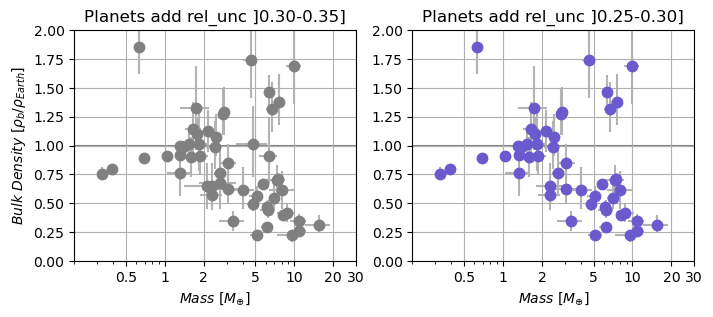

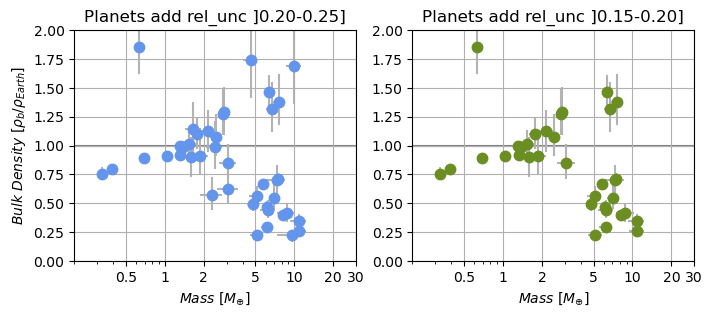

In [144]:
plt.figure(figsize=(8, 3))
markersize = 15
plt.subplot(1, 2, 1)
EA_planets = filter_planets(planet_name_EA,0.35,0.35)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.30-0.35]",color = "grey",markersize = markersize)
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.title("Planets add rel_unc ]0.30-0.35]"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); plt.grid()

plt.subplot(1, 2, 2)
EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.25-0.30]",color = "slateblue",markersize = markersize)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.xscale("log"); plt.title("Planets add rel_unc ]0.25-0.30]"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); plt.grid()

plt.figure(figsize=(8, 3))
markersize = 15
plt.subplot(1, 2, 1)
EA_planets = filter_planets(planet_name_EA,0.25,0.25)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",color = "cornflowerblue",markersize = markersize)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.title("Planets add rel_unc ]0.20-0.25]"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); plt.grid()

plt.subplot(1, 2, 2)
EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.15-0.20]",color = "olivedrab",markersize = markersize)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.xscale("log"); plt.title("Planets add rel_unc ]0.15-0.20]"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); plt.grid()


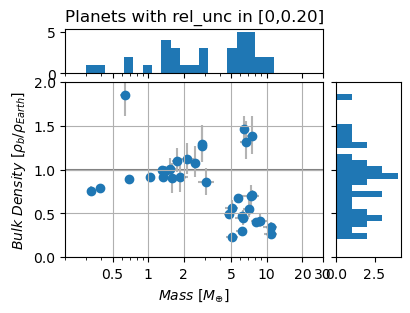

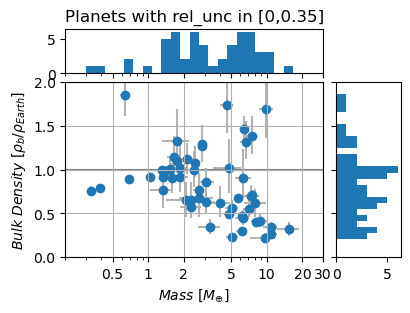

In [145]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    num_bins = 30
    binsy = np.linspace(start=0,stop=2, num=num_bins)
    binsx =np.logspace(start=np.log10(0.1),stop=np.log10(20), num=num_bins)
    
    ax_histx.hist(x, bins=binsx)
    ax_histy.hist(y, bins=binsy, orientation='horizontal')

EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]


fig = plt.figure(figsize=(4,3),layout='constrained')
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(mass, np.divide(density,earth_density), ax, ax_histx, ax_histy)
ax.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.xlabel("$Mass\ [M_{\oplus}]$");plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.title("Planets with rel_unc in [0,0.20]"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); 
plt.grid(zorder=-40)

EA_planets = filter_planets(planet_name_EA,0.35,0.35)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]

fig = plt.figure(figsize=(4,3),layout='constrained')
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(mass, np.divide(density,earth_density), ax, ax_histx, ax_histy)
ax.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.xlabel("$Mass\ [M_{\oplus}]$");plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.title("Planets with rel_unc in [0,0.35]"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); 
plt.grid(zorder=-40)
plt.show()


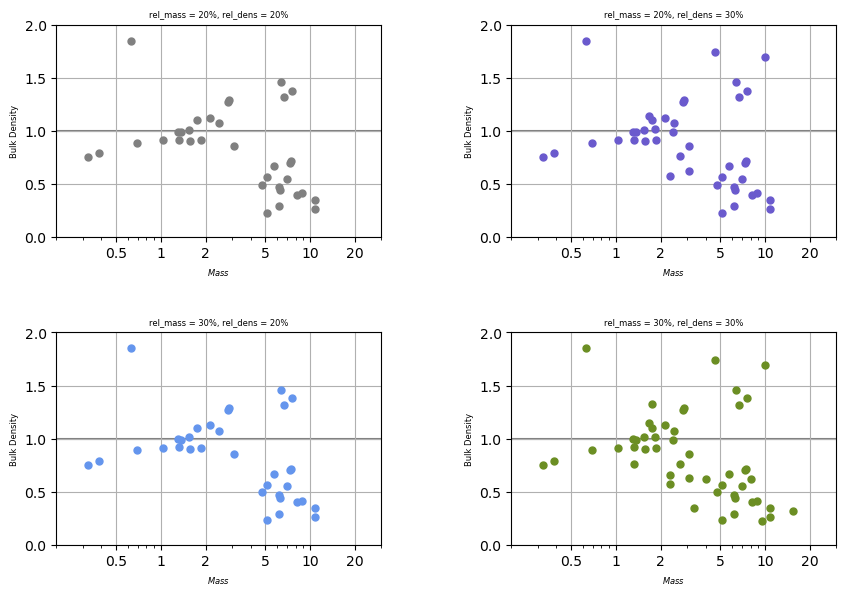

In [148]:
markersize = 10
fontsize = 6
plt.figure(figsize = (12,8))
plt.subplot(2, 2, 1)
EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.30-0.35]",color = "grey",markersize = markersize)
plt.title("rel_mass = 20%, rel_dens = 20%",fontsize=fontsize)
plt.xlabel("$Mass$",fontsize=fontsize);plt.ylabel("Bulk Density",fontsize=fontsize); plt.xscale("log"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20],["0.5","1","2","5","10","20"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); 
plt.grid(zorder=-40)

plt.subplot(2, 2, 2)
EA_planets = filter_planets(planet_name_EA,0.20,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.25-0.30]",color = "slateblue",markersize = markersize)
plt.title("rel_mass = 20%, rel_dens = 30%",fontsize=fontsize)
plt.xlabel("$Mass$",fontsize=fontsize);plt.ylabel("Bulk Density",fontsize=fontsize); plt.xscale("log"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20],["0.5","1","2","5","10","20"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); 
plt.grid(zorder=-40)

plt.subplot(2, 2, 3)
EA_planets = filter_planets(planet_name_EA,0.30,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",color = "cornflowerblue",markersize = markersize)
plt.title("rel_mass = 30%, rel_dens = 20%",fontsize=fontsize)
plt.xlabel("$Mass$",fontsize=fontsize);plt.ylabel("Bulk Density",fontsize=fontsize); plt.xscale("log"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20],["0.5","1","2","5","10","20"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); 
plt.grid(zorder=-40)

plt.subplot(2, 2, 4)
EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.15-0.20]",color = "olivedrab",markersize = markersize)
plt.title("rel_mass = 30%, rel_dens = 30%",fontsize=fontsize)
plt.xlabel("$Mass$",fontsize=fontsize);plt.ylabel("Bulk Density",fontsize=fontsize); plt.xscale("log"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20],["0.5","1","2","5","10","20"],minor=False); plt.hlines(1,0,30,"grey",zorder = -30); 
plt.grid(zorder=-40)
plt.subplots_adjust(left=0.05,
                    bottom=0.05,
                    right=0.7,
                    top=0.7,
                    wspace=0.4,
                    hspace=0.45)